<a href="https://colab.research.google.com/github/anushkagupta1307/IR2022_Project_27/blob/main/IR_Project_ThirdBaseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Method to get Reviews from a product on Amazon-
#This method takes the Product URL as the input and fetches all the Reviews on the product on that URL
#Implemented using BeautifulSoup library
#The method returns a dataframe consisting of Customer Name, Review Title, Rating and Review
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
def scraping_amazon_reviews(url):

  flag=0;
  count=0;
  u=1;

  link=url
  page = requests.get(link)
  soup = bs(page.content,'html.parser')
  total_ratings = soup.find_all("",{"data-hook":"cr-filter-info-review-rating-count"})
  #print(total_ratings)
  total_ratings_lstrips=total_ratings[0].get_text().lstrip('\n')
  total_ratings_rstrips=total_ratings_lstrips.rstrip('\n')
  total_ratings_rstrips = total_ratings_rstrips.replace(",", "")
  result = total_ratings_rstrips.index('total ratings')

  #print(result)

  position=0
  for i in range(result-2,0,-1):
      if total_ratings_rstrips[i]==' ':
        position=i
        break;

  #print(position)


  total_ratings_final=int(total_ratings_rstrips[position+1:result-1])
  #print(total_ratings_final)
  

  df = pd.DataFrame(columns = ['Customer Name', 'Review title', 'Ratings','Reviews'])
  # u<=(total_ratings_final/10)
  while(u<=(200)):
    url=url+"&pageNumber="+str(u)
    page = requests.get(url)

    if page.status_code!=200:
      #print("breaked at",u)
      flag=1
      continue;
    
    soup = bs(page.content,'html.parser')

    names = soup.find_all('span',class_='a-profile-name')
    cust_name = []
    for i in range(0,len(names)):
        cust_name.append(names[i].get_text())

    cust_name.pop(0)
    cust_name.pop(0)

    indexes_to_remove=[]
    for i in range(len(cust_name)):
      
      for j in range(i+1,len(cust_name)):
        if cust_name[i]==cust_name[j]:
          #print(cust_name[i])
          indexes_to_remove.append(j)

    for i in range(len(indexes_to_remove)-1,-1,-1):
        cust_name.pop(indexes_to_remove[i])


    title = soup.find_all('a',class_='review-title-content')
    review_title = []
    for i in range(0,len(title)):
        review_title.append(title[i].get_text())
    
    review_title[:] = [titles.lstrip('\n') for titles in review_title]
    review_title[:] = [titles.rstrip('\n') for titles in review_title]

    
    rating = soup.find_all('i',class_='review-rating')
    rate = []
    for i in range(0,len(rating)):
        rate.append(rating[i].get_text())

    rate.pop(0)
    rate.pop(0)

    review = soup.find_all("span",{"data-hook":"review-body"})

    review_content = []
    for i in range(0,len(review)):
        review_content.append(review[i].get_text())

    review_content[:] = [reviews.lstrip('\n') for reviews in review_content]
    review_content[:] = [reviews.rstrip('\n') for reviews in review_content]
    #print(review_content)

    for i in range(len(cust_name)):
      
      df=df.append({'Customer Name':cust_name[i], 'Review title':review_title[i], 'Ratings':rate[i],'Reviews':review_content[i]},ignore_index=True)

    u=u+1
    count=count+1

  #print(df)
  return df;


In [ ]:
#Calling the above defined method with a Redmi Mobile Amazon URL
df=scraping_amazon_reviews("https://www.amazon.in/Redmi-Activ-Metallic-Purple-Storage/product-reviews/B09GFNZT24/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews")

In [ ]:
#Dispalying the generated dataframe
df

,Customer Name,Review title,Ratings,Reviews
0,Ashish,DONT BUY THIS MOBILE .,1.0 out of 5 stars,Don’t buy this product .Image quality is below...
1,ADIL.T.M,"Redmi 9 hhoo, 9, 9🤩, 9, changed mind",4.0 out of 5 stars,Let’s make one thing clear immediately: the Xi...
2,Taufeeque Alam,Awesome,5.0 out of 5 stars,Awesome
3,Amazon Customer,Worst experience,1.0 out of 5 stars,Very bad experience from Amazon. Very bad came...
4,Sourabh Meena,Best in budget,5.0 out of 5 stars,Best buy at this price! The display quality is...
...,...,...,...,...
1595,Amazon Customer,Worst experience,1.0 out of 5 stars,Very bad experience from Amazon. Very bad came...
1596,Sourabh Meena,Best in budget,5.0 out of 5 stars,Best buy at this price! The display quality is...
1597,Thirunavukarasu,Think it before buy,4.0 out of 5 stars,i didn't upload photo ....for any reason but i...
1598,Anup mall,Everything is fine except camera which only wo...,1.0 out of 5 stars,This phone is not value for moneyIts a downgra...


In [ ]:
#Extract the ratings as a float value from the above Rating column and create a separate column in the dataframe for float rating
extracted_ratings=[]
for i in range(len(df)):
  for j in range(len(df['Ratings'][i])):
    if df['Ratings'][i][j]==" ":
      count=j
      break;
  #print(count)

  #print(df_sorted_price['overall rating'][i][:count])
  extracted_ratings.append(float(df['Ratings'][i][:count]))


In [ ]:
#Append the extracted ratings column to the dataframe
df['extracted ratings']=extracted_ratings

In [ ]:
df

,Customer Name,Review title,Ratings,Reviews,extracted ratings
0,Ashish,DONT BUY THIS MOBILE .,1.0 out of 5 stars,Don’t buy this product .Image quality is below...,1.0
1,ADIL.T.M,"Redmi 9 hhoo, 9, 9🤩, 9, changed mind",4.0 out of 5 stars,Let’s make one thing clear immediately: the Xi...,4.0
2,Taufeeque Alam,Awesome,5.0 out of 5 stars,Awesome,5.0
3,Amazon Customer,Worst experience,1.0 out of 5 stars,Very bad experience from Amazon. Very bad came...,1.0
4,Sourabh Meena,Best in budget,5.0 out of 5 stars,Best buy at this price! The display quality is...,5.0
...,...,...,...,...,...
1595,Amazon Customer,Worst experience,1.0 out of 5 stars,Very bad experience from Amazon. Very bad came...,1.0
1596,Sourabh Meena,Best in budget,5.0 out of 5 stars,Best buy at this price! The display quality is...,5.0
1597,Thirunavukarasu,Think it before buy,4.0 out of 5 stars,i didn't upload photo ....for any reason but i...,4.0
1598,Anup mall,Everything is fine except camera which only wo...,1.0 out of 5 stars,This phone is not value for moneyIts a downgra...,1.0


In [ ]:
#Method to generate the polarity score of a text
from textblob import TextBlob
# function to calculate polarity
def getPolarity(review):
  return TextBlob(review).sentiment.polarity

In [ ]:
#Get the polarity of each word in the review and calculate sum of polarity
total_words_polarity_score=[]
for i in range(len(df)):
  words=df['Reviews'][i].split(' ')

  words_polarity=0.0
  for word in words:
    if word=="":
      polarity=0.0
    else:
      polarity=getPolarity(word)
    
    words_polarity=words_polarity+float(polarity)

  total_words_polarity_score.append(words_polarity)
  

In [ ]:
#Append the total words polarity score in the dataframe
df['total_words_polarity_score']=total_words_polarity_score

In [ ]:
#Get the Maximum and minimum value of polarity score in the dataframe
#This will be further used for normalization
minimum_value=df['total_words_polarity_score'].min()
maximum_value=df['total_words_polarity_score'].max()
print(minimum_value)
print(maximum_value)

-0.9999999999999997
12.348809523809516


In [ ]:
df.columns

Index(['Customer Name', 'Review title', 'Ratings', 'Reviews',
       'extracted ratings', 'total_words_polarity_score'],
      dtype='object')

In [ ]:
#Normalization on polarity score column- formula from research paper- 
#𝑁𝑃𝑅𝑆 = 𝑆𝑐𝑜𝑟𝑒−𝑀𝐼𝑁 / √(𝑃𝑟𝑜𝑑𝑢𝑐𝑡−𝑟𝑎𝑡𝑖𝑛𝑔).(𝑀𝐴𝑋−𝑀𝐼𝑁)
normalized_polarized_score=[]
import math
for i in range(len(df)):
  temp=(float(df['total_words_polarity_score'][i])-minimum_value)/math.sqrt(df['extracted ratings'][i]*(maximum_value-minimum_value))
  #print(math.sqrt(df['extracted ratings'][i]*(maximum_value-minimum_value)))
  #temp_value=(float(df['total_words_polarity_score'][i])-minimum_value)/math.sqrt((df['extracted ratings'][i]-(maximum_value-minimum_value)))
  normalized_polarized_score.append(temp)


In [ ]:
#append the normalized polarity values in the dataframe
df['normalized_polarized_score']=normalized_polarized_score

In [ ]:
df

,Customer Name,Review title,Ratings,Reviews,extracted ratings,total_words_polarity_score,normalized_polarized_score
0,Ashish,DONT BUY THIS MOBILE .,1.0 out of 5 stars,Don’t buy this product .Image quality is below...,1.0,-0.65000,0.095796
1,ADIL.T.M,"Redmi 9 hhoo, 9, 9🤩, 9, changed mind",4.0 out of 5 stars,Let’s make one thing clear immediately: the Xi...,4.0,12.34881,1.826801
2,Taufeeque Alam,Awesome,5.0 out of 5 stars,Awesome,5.0,1.00000,0.244807
3,Amazon Customer,Worst experience,1.0 out of 5 stars,Very bad experience from Amazon. Very bad came...,1.0,-1.00000,0.000000
4,Sourabh Meena,Best in budget,5.0 out of 5 stars,Best buy at this price! The display quality is...,5.0,1.57500,0.315189
...,...,...,...,...,...,...,...
1595,Amazon Customer,Worst experience,1.0 out of 5 stars,Very bad experience from Amazon. Very bad came...,1.0,-1.00000,0.000000
1596,Sourabh Meena,Best in budget,5.0 out of 5 stars,Best buy at this price! The display quality is...,5.0,1.57500,0.315189
1597,Thirunavukarasu,Think it before buy,4.0 out of 5 stars,i didn't upload photo ....for any reason but i...,4.0,1.40000,0.328443
1598,Anup mall,Everything is fine except camera which only wo...,1.0 out of 5 stars,This phone is not value for moneyIts a downgra...,1.0,0.90000,0.520035


In [ ]:
#import necessary libraries
import os
import pydrive
import re
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import nltk
#nltk library for preprocessing
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
#Preprocessing the reviews
#remove whitespaces, Remove numerics, Remove special characters, Remove Stopwords, convert to lowercase
preprocessed_query_list=[]
for i in range(len(df)):
  temp_review=df['Reviews'][i]
  temp_review = temp_review.lower()
  temp_review = re.sub(r'\d+','',temp_review)
  temp_review = re.sub(r'[^\w\s]','', temp_review)
  temp_review= re.sub('[@_!#$%^&*()<>?/\|}{~:]','',temp_review)
  temp_review = temp_review.strip()
  temp_review = remove_stopwords(temp_review)
  words = word_tokenize(temp_review)
  temp_string=""
  for word in words:
    temp_string=temp_string+" "+(word)

  preprocessed_query_list.append(temp_string)

In [ ]:
#Append the preprocessed review to the dataframe
df['preprocessed_query_list']=preprocessed_query_list

In [ ]:
df

,Customer Name,Review title,Ratings,Reviews,extracted ratings,total_words_polarity_score,normalized_polarized_score,preprocessed_query_list
0,Ashish,DONT BUY THIS MOBILE .,1.0 out of 5 stars,Don’t buy this product .Image quality is below...,1.0,-0.65000,0.095796,dont buy product image quality average compar...
1,ADIL.T.M,"Redmi 9 hhoo, 9, 9🤩, 9, changed mind",4.0 out of 5 stars,Let’s make one thing clear immediately: the Xi...,4.0,12.34881,1.826801,lets thing clear immediately xiaomi redmi pho...
2,Taufeeque Alam,Awesome,5.0 out of 5 stars,Awesome,5.0,1.00000,0.244807,awesome
3,Amazon Customer,Worst experience,1.0 out of 5 stars,Very bad experience from Amazon. Very bad came...,1.0,-1.00000,0.000000,bad experience amazon bad camera quality phon...
4,Sourabh Meena,Best in budget,5.0 out of 5 stars,Best buy at this price! The display quality is...,5.0,1.57500,0.315189,best buy price display quality amazing compla...
...,...,...,...,...,...,...,...,...
1595,Amazon Customer,Worst experience,1.0 out of 5 stars,Very bad experience from Amazon. Very bad came...,1.0,-1.00000,0.000000,bad experience amazon bad camera quality phon...
1596,Sourabh Meena,Best in budget,5.0 out of 5 stars,Best buy at this price! The display quality is...,5.0,1.57500,0.315189,best buy price display quality amazing compla...
1597,Thirunavukarasu,Think it before buy,4.0 out of 5 stars,i didn't upload photo ....for any reason but i...,4.0,1.40000,0.328443,didnt upload photo reason mark display cam fi...
1598,Anup mall,Everything is fine except camera which only wo...,1.0 out of 5 stars,This phone is not value for moneyIts a downgra...,1.0,0.90000,0.520035,phone value moneyits downgraded phone earlier...


In [ ]:
#If the sum of polarity score of all words in the string is >0- classify it as 1, 
#if <0 then classify it as -1, if 0 then classify it as 0
polarity_scores_value=[]
for i in range(len(df)):
  if(df['total_words_polarity_score'][i]>0):
    polarity_scores_value.append(1)
  elif(df['total_words_polarity_score'][i]==0):
    polarity_scores_value.append(0)
  else:
    polarity_scores_value.append(-1)

In [ ]:
#Append the polarity score value in the dataframe
df['polarity_scores_value']=polarity_scores_value

In [ ]:
df['normalized_polarized_score'].unique()

array([0.09579587, 1.82680113, 0.24480694, 0.        , 0.31518894,
       0.32844298, 0.52003471, 0.14688416])

In [ ]:
#splitting data to sample data for training and rest for predicting the sample
df_train=df.iloc[:8, :]
df_test=df.iloc[8:,:]

In [ ]:
#x as the preprocessed review and y is the polarity score sum of the words in the review
x = df_train['preprocessed_query_list']
y = df_train['polarity_scores_value']
from sklearn.model_selection import train_test_split
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

In [ ]:
#using PCA to reduce the number of features
from sklearn.decomposition import PCA
pca = PCA()
Xtrain = pca.fit_transform(x)
Xtest = pca.transform(x_test)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
#method 1- Using adaboost classifier
model = AdaBoostClassifier()

In [ ]:
#Fit the model on adaboost classifier
model.fit(Xtrain, y)

AdaBoostClassifier()

In [ ]:
x_testing = df_test['preprocessed_query_list']
y_testing = df_test['polarity_scores_value']

In [ ]:
x_testing = vec.transform(x_testing).toarray()

In [ ]:
Xtesting = pca.transform(x_testing)

In [ ]:
y_predicted=model.predict(Xtesting)

In [ ]:
y_predicted

array([-1,  1,  1, ...,  1,  1,  1])

In [ ]:
count_positive=0
count_negative=0
for i in range(len(y_predicted)):
  if y_predicted[i]==1:
    count_positive=count_positive+1
  else:
    count_negative=count_negative+1


In [ ]:
if(count_positive>count_negative):
  print("You can go for the selected device :) ")
else:
  print("Maybe you can go with any other option available :( ")

You can go for the selected device :) 


In [ ]:
model.score(Xtesting, y_testing)

0.875

In [ ]:
import pickle
with open('thirdbaseline_model1', 'wb') as files:
    pickle.dump(model, files)

In [ ]:
#method 2- usie Random forest for classification
import sklearn.ensemble
clf_rf=sklearn.ensemble.RandomForestClassifier()
clf_rf.fit(Xtrain, y)
print('random forest score is',clf_rf.score(Xtesting, y_testing))
#print('importance for features in random forest are::',clf_rf.feature_importances_)

random forest score is 0.875


In [ ]:
y_predicted=clf_rf.predict(Xtesting)

count_positive=0
count_negative=0
for i in range(len(y_predicted)):
  if y_predicted[i]==1:
    count_positive=count_positive+1
  else:
    count_negative=count_negative+1

if(count_positive>count_negative):
  print("You can go for the selected device :) ")
else:
  print("Maybe you can go with any other option available :( ")

You can go for the selected device :) 


In [ ]:
import pickle
with open('thirdbaseline_model2', 'wb') as files:
    pickle.dump(clf_rf, files)

In [ ]:
#creating decision tree 
import sklearn.tree
df_gini=sklearn.tree.DecisionTreeClassifier()


df_gini.fit(Xtrain, y)
print("decision tree score",df_gini.score(Xtesting, y_testing))

decision tree score 0.875


In [ ]:
y_predicted=df_gini.predict(Xtesting)

count_positive=0
count_negative=0
for i in range(len(y_predicted)):
  if y_predicted[i]==1:
    count_positive=count_positive+1
  else:
    count_negative=count_negative+1

if(count_positive>count_negative):
  print("You can go for the selected device :) ")
else:
  print("Maybe you can go with any other option available :( ")

You can go for the selected device :) 


In [ ]:
import pickle
with open('thirdbaseline_model3', 'wb') as files:
    pickle.dump(df_gini, files)

[Text(0.5, 0.75, 'X[1] <= 1.822\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

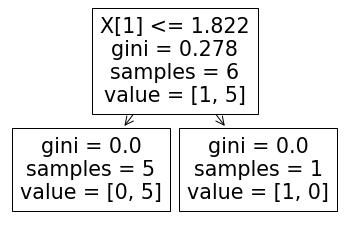

In [ ]:
#Plotting the decision tree
from sklearn import tree
tree.plot_tree(df_gini)